In [1]:
pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   -------- ------------------------------ 41.0/191.0 kB 960.0 kB/s eta 0:00:01
   -------------------------------------- - 184.3/191.0 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import praw
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YAhia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
reddit=praw.Reddit(
    client_id="D5g3Wq6BmGcJCgfXOYyB-Q",
    client_secret="B-mZy2wiDVnU0O_kyzBE2mGIMIjEog",
    user_agent="Scraper 1.0 by /u/LaazyPixie"
)



In [7]:
headlines=set()
for subred in reddit.subreddit('politics').hot(limit=None):
  headlines.add(subred.title)
df=pd.DataFrame(headlines)
df

,0
0,Trump received millions of dollars from foreig...
1,"Ahead of second E. Jean Carroll trial, Trump h..."
2,Transcript: Biden’s first campaign speech of t...
3,$8.5 Trillion in Untaxed Assets: Data Shows Wh...
4,Joe Biden just delivered the speech Democrats ...
...,...
705,How the GOP’s rewriting of Jan. 6 paved the wa...
706,Why Are Republicans So Bad at Podcasting? Ted ...
707,Massachusetts Democrats call for removing Cuba...
708,Trump’s evangelical voters remain loyal as he ...


In [8]:
df.to_csv('headlines.csv',header=False,index=False,encoding='utf-8')

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YAhia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
sia=SIA()
results=[]
for line in headlines:
  pol_score=sia.polarity_scores(line)
  pol_score['headline']=line
  results.append(pol_score)
df=pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Trump received millions of dollars from foreig...
1,0.000,1.000,0.000,0.0000,"Ahead of second E. Jean Carroll trial, Trump h..."
2,0.000,1.000,0.000,0.0000,Transcript: Biden’s first campaign speech of t...
3,0.000,0.843,0.157,0.7778,$8.5 Trillion in Untaxed Assets: Data Shows Wh...
4,0.150,0.850,0.000,-0.3182,Joe Biden just delivered the speech Democrats ...
...,...,...,...,...,...
705,0.000,1.000,0.000,0.0000,How the GOP’s rewriting of Jan. 6 paved the wa...
706,0.288,0.712,0.000,-0.7841,Why Are Republicans So Bad at Podcasting? Ted ...
707,0.298,0.702,0.000,-0.5267,Massachusetts Democrats call for removing Cuba...
708,0.214,0.584,0.201,-0.0516,Trump’s evangelical voters remain loyal as he ...


In [11]:
df['score']=0
df.loc[df['compound']<-0.2,'score']=-1
df.loc[df['compound']>0.2,'score']=1
df

,neg,neu,pos,compound,headline,score
0,0.000,1.000,0.000,0.0000,Trump received millions of dollars from foreig...,0
1,0.000,1.000,0.000,0.0000,"Ahead of second E. Jean Carroll trial, Trump h...",0
2,0.000,1.000,0.000,0.0000,Transcript: Biden’s first campaign speech of t...,0
3,0.000,0.843,0.157,0.7778,$8.5 Trillion in Untaxed Assets: Data Shows Wh...,1
4,0.150,0.850,0.000,-0.3182,Joe Biden just delivered the speech Democrats ...,-1
...,...,...,...,...,...,...
705,0.000,1.000,0.000,0.0000,How the GOP’s rewriting of Jan. 6 paved the wa...,0
706,0.288,0.712,0.000,-0.7841,Why Are Republicans So Bad at Podcasting? Ted ...,-1
707,0.298,0.702,0.000,-0.5267,Massachusetts Democrats call for removing Cuba...,-1
708,0.214,0.584,0.201,-0.0516,Trump’s evangelical voters remain loyal as he ...,0


In [12]:
DF=df[['headline','score']]
DF

,headline,score
0,Trump received millions of dollars from foreig...,0
1,"Ahead of second E. Jean Carroll trial, Trump h...",0
2,Transcript: Biden’s first campaign speech of t...,0
3,$8.5 Trillion in Untaxed Assets: Data Shows Wh...,1
4,Joe Biden just delivered the speech Democrats ...,-1
...,...,...
705,How the GOP’s rewriting of Jan. 6 paved the wa...,0
706,Why Are Republicans So Bad at Podcasting? Ted ...,-1
707,Massachusetts Democrats call for removing Cuba...,-1
708,Trump’s evangelical voters remain loyal as he ...,0


In [13]:
DF.to_csv('headline_score.csv',encoding='utf-8',index=False)

In [37]:
DF.score.value_counts()

 0    274
-1    266
 1    123
Name: score, dtype: int64

In [38]:
DF.score.value_counts(normalize=True)*100

 0    41.327300
-1    40.120664
 1    18.552036
Name: score, dtype: float64

In [39]:
print("Quelque positive headlines:")
pprint(list(DF[DF['score']==1].headline)[:5],width=200)

print("____________________________________________________________________________________________________________")

print("Quelque neutre headlines:")
pprint(list(DF[DF['score']==0].headline)[:5],width=200)

print("____________________________________________________________________________________________________________")

print("Quelque negative headlines:")
pprint(list(DF[DF['score']==-1].headline)[:5],width=200)

Quelque positive headlines:
['DeSantis, Haley pledge to pardon Trump if he’s convicted',
 "NY's right-to-repair law is in effect. Advocates figure it'll save you about $330.",
 'Colorado GOP asks US Supreme Court to overturn ruling disqualifying Trump from 2024 ballot',
 'Colorado Republicans appeal to supreme court after Trump disqualified from state ballot',
 'Virginia Attorney General wins appeal in voter misinformation case against conservative group']
____________________________________________________________________________________________________________
Quelque neutre headlines:
['Motion filed to remove Trump from Virginia ballots',
 'Kinzinger says Christians who back Trump ‘don’t understand’ their religion',
 'Raskin suggests Clarence Thomas should recuse himself from Trump 14th Amendment decision',
 'U.S. must enforce immigration laws along the southern border, Rep. Gonzalez says',
 '‘Four years of getting even’: voters in former Trump stronghold mixed on possible second t

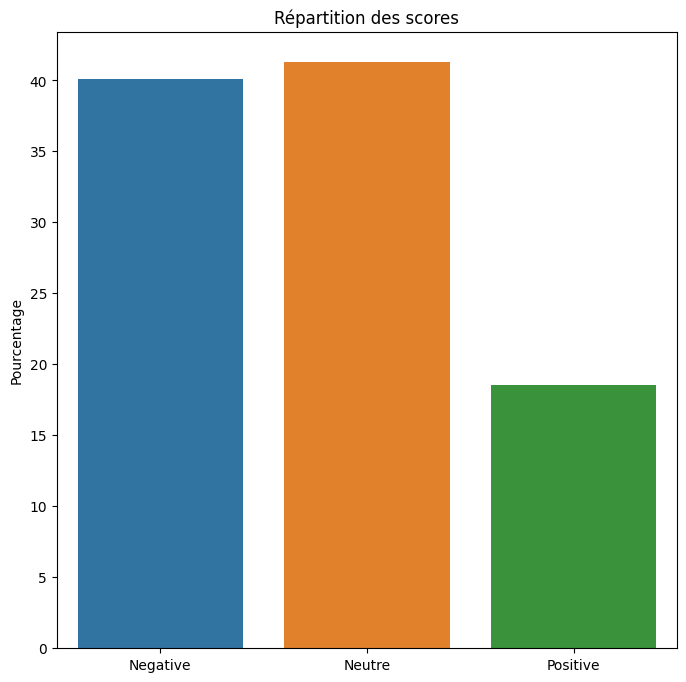

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
counts=DF.score.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Neutre','Positive'])
ax.set_ylabel('Pourcentage')
ax.set_title('Répartition des scores')
plt.show()